In [16]:
import json
import os
import re
import pandas as pd
import numpy as np
import torch as T

from copy import deepcopy
from torch.utils import data
from torchvision.transforms.functional import resize, crop
from torchvision.io import read_image, ImageReadMode
from torch.nn.functional import one_hot, pad

from motion_capture.data.datasets import scale_points

# CelebA

In [4]:
import matplotlib.pyplot as plt
from matplotlib import patches
import torch as T

from motion_capture.data.datasets import CelebA


image_shape = (448, 224)
celeba_dataset = CelebA(
    annotatin_path="\\\\192.168.2.206\\data\\datasets\\CelebA\\Anno",
    image_path="\\\\192.168.2.206\\data\\datasets\\CelebA\\img\\img_align_celeba\\img_celeba",
    image_shape_WH = image_shape
)

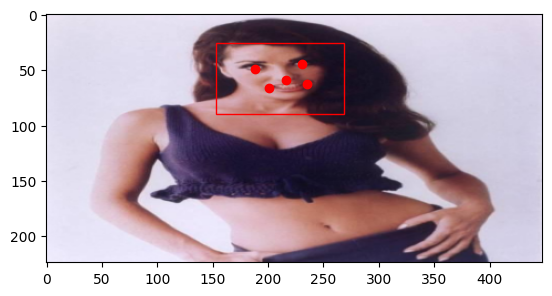

In [5]:
test_i = 10

x, y = celeba_dataset[test_i]

plt.imshow((x * 255).permute(1, 2, 0).round().byte().numpy())

x1, y1, x2, y2 = y["bbox"] * T.tensor(image_shape * 2)
plt.gca().add_patch(
    patches.Rectangle(
        (x1, y1),
        x2 - x1, y2 - y1,
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
)

for kpt in y["keypoints"]:
    plt.scatter(kpt[0] * image_shape[0], kpt[1] * image_shape[1], c="r")

plt.show()

# FreiHAND

In [25]:
import json
import os
from torch.utils import data


class FreiHAND(data.Dataset):
    
    def __init__(self, path: str):
        
        super().__init__()
        
        train_path = os.path.join(path, "FreiHAND_pub_v2")
        # val_path = os.path.join(path, "FreiHAND_pub_v2_eval")
        
        self.rgb_image_path = os.path.join(train_path, "training", "rgb")
        self.mask_image_path = os.path.join(train_path, "training", "mask")
        
        with open(os.path.join(train_path, "training_scale.json")) as f:
            self.scale = json.load(f)
        with open(os.path.join(train_path, "training_mano.json")) as f:
            self.mano = json.load(f)
        with open(os.path.join(train_path, "training_xyz.json")) as f:
            self.xyz = json.load(f)

freihand_dataset = FreiHAND(
    path = "\\\\192.168.2.206\\data\\datasets\\FreiHAND"
)

In [34]:
freihand_dataset.mano[0]

[[0.721924364566803,
  0.6972370147705078,
  -0.7899668216705322,
  -0.005629386752843857,
  -0.020847106352448463,
  -0.25697168707847595,
  0.019605889916419983,
  0.020119965076446533,
  -0.752727746963501,
  0.016962876543402672,
  -0.16247829794883728,
  -0.47104501724243164,
  0.2712077796459198,
  0.07267540693283081,
  -0.38628798723220825,
  -0.0600123330950737,
  -0.04881877079606056,
  -0.7962555289268494,
  0.037846919149160385,
  -0.04672650247812271,
  -0.49364858865737915,
  0.5203770399093628,
  0.0690668448805809,
  -0.5552831292152405,
  0.21080641448497772,
  -0.20642486214637756,
  -0.3631074130535126,
  0.3601369559764862,
  -0.027657518163323402,
  -0.5777040719985962,
  0.28868335485458374,
  0.05730121210217476,
  -0.4341995418071747,
  0.1606927365064621,
  -0.2036343216896057,
  -0.8283606767654419,
  0.13506746292114258,
  0.09893530607223511,
  -0.45706236362457275,
  -0.007289777975529432,
  -0.26253533363342285,
  -0.17645134031772614,
  0.0799409225583076

# WIDER Face

In [1]:
from motion_capture.data.datasets import WIDERFace
import torch as T
import matplotlib.pyplot as plt
from matplotlib import patches

image_shape = (448, 224)
wider_face_dataset = WIDERFace(
    path="//192.168.2.206/data/datasets/WIDER-Face",
    image_shape_WH=image_shape,
    max_number_of_faces=10)
len(wider_face_dataset)

12206

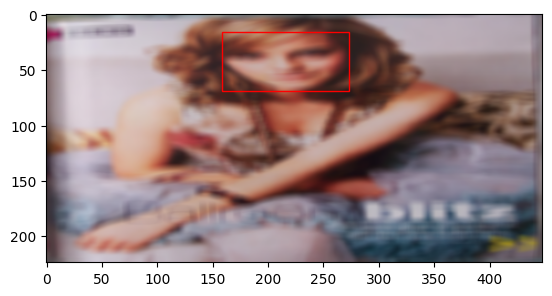

: 

In [62]:
test_i = 1

# plot image with bounding boxes
x, y = wider_face_dataset[test_i]
x = (x.permute(1, 2, 0) * 255).round().byte().numpy()

plt.imshow(x)

# print(y["bboxes"], y["validity"].argmax(1))

for i, bbox in enumerate(y["bboxes"]):
    if not y["validity"].argmax(1)[i]:
        continue
    
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1), 
            x2 - x1, y2 - y1,
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

plt.show()

# WFLW Face Recognition

In [3]:
import torch as T
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from motion_capture.data.datasets import WFLW

image_shape = (448, 224)
wflw_dataset = WFLW(
    image_shape_WH=image_shape, 
    path="//192.168.2.206/data/datasets/WFLW",
    max_number_of_faces=10
)
len(wflw_dataset)

6551

tensor([256.3750,  11.0040, 326.3750,  47.7847])
tensor([170.1875,  34.9717, 252.8750,  59.8439])


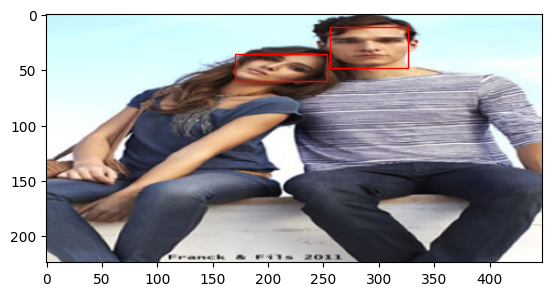

In [4]:
test_i = 1

x, y = wflw_dataset[test_i]

x = (x.permute(1, 2, 0) * 255).round().byte().numpy()

plt.imshow(x)

for i, bbox in enumerate(y["bboxes"]):
    if y["validity"].argmax(1)[i] == 0:
        continue
    
    print(bbox * T.tensor(image_shape * 2))
    
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1), 
            x2 - x1, y2 - y1,
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

plt.show()

# COFW Face Detection

In [1]:
import torch as T
from motion_capture.data.datasets import COFWFaceDetection
import matplotlib.pyplot as plt
from matplotlib import patches

image_shape = (224, 224)
cofw_color_dataset = COFWFaceDetection(
    path="//192.168.2.206/data/datasets/COFW/",
    image_shape_WH=image_shape)
len(cofw_color_dataset)

1852

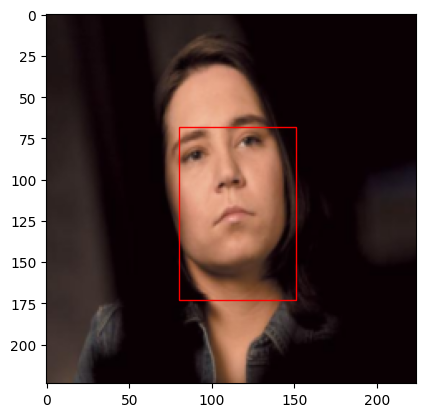

In [6]:
test_i = 115

x, y = cofw_color_dataset[test_i]

x = (x.permute(1, 2, 0) * 255).round().byte().numpy()

plt.imshow(x)

x1, y1, x2, y2 = y["bbox"] * T.tensor(image_shape * 2)
plt.gca().add_patch(
    patches.Rectangle(
        (x1, y1),
        x2 - x1, y2 - y1, 
        linewidth=1, 
        edgecolor="red", 
        facecolor="none"))


# COCO Global Person Instance Segmentation

In [251]:
# class COCO2017GlobalPersonInstanceSegmentation(data.Dataset):
    
#     def __init__(
#         self,
#         image_folder_path: str,
#         annotation_folder_path: str,
#         image_shape_WH: tuple,
#         max_num_persons: int,
#         max_segmentation_points: int = 100,
#         min_bbox_size: int = 50):
        
#         super().__init__()
        
#         self.max_num_persons = max_num_persons
#         self.max_segmentation_points = max_segmentation_points
#         self.image_shape = image_shape_WH
        
#         with open(os.path.join(annotation_folder_path, "person_keypoints_train2017.json"), "r") as f:
#             train_json = json.load(f)
#         with open(os.path.join(annotation_folder_path, "person_keypoints_val2017.json"), "r") as f:
#             val_json = json.load(f)
        
#         images = pd.DataFrame.from_records((*train_json["images"], *val_json["images"]))
#         annotations = pd.DataFrame.from_records((*train_json["annotations"], *val_json["annotations"]))
        
#         self.all_datapoints = pd.merge(
#             left = annotations,
#             right = images,
#             left_on = "image_id",
#             right_on = "id",
#         )
        
#         self.all_datapoints["image_path"] = image_folder_path + "/" + self.all_datapoints["file_name"]
#         self.all_datapoints = self.all_datapoints[self.all_datapoints["bbox"].apply(lambda x: x[2] * x[3] > (min_bbox_size**2))]
#         self.all_datapoints = self.all_datapoints[self.all_datapoints["segmentation"].apply(type) == list]
        
#         self.all_datapoints.drop(columns=[
#             "num_keypoints", "area", "iscrowd", "keypoints",
#             "image_id", "category_id", "id_x", "license", "file_name",
#             "coco_url", "height", "width", "date_captured", "flickr_url", "id_y"
#             ], inplace=True)
        
#         self.all_datapoints = self.all_datapoints.groupby("image_path")
#         person_count_mask = self.all_datapoints.size() <= max_num_persons
#         self.all_datapoints = self.all_datapoints.aggregate(lambda x: x.tolist())
#         self.all_datapoints = self.all_datapoints[person_count_mask]
#         self.all_datapoints.reset_index(inplace=True)
    
#     def __len__(self):
#         return len(self.all_datapoints)
    
#     def __getitem__(self, idx):
#         dp = self.all_datapoints.iloc[idx]
        
#         image = read_image(dp["image_path"], mode=ImageReadMode.RGB).to(dtype=T.float32)
#         bboxes = dp["bbox"]
#         segmentations = dp["segmentation"]
        
#         bboxes_ = T.zeros(self.max_num_persons, 4)
        
#         bboxes = T.tensor(bboxes, dtype=T.float32).reshape(-1, 2, 2) # ([scale_points(T.tensor(bbox).reshape(2, 2), self.image_shape[::-1], [1, 1]) for bbox in bboxes])
#         bboxes = scale_points(bboxes, image.shape[::-1][:2], [1, 1])
#         bboxes[:, 1, :] += bboxes[:, 0, :]
#         bboxes = bboxes.reshape(-1, 4)
        
#         bboxes_[:bboxes.shape[0]] = bboxes[:]
        
        
#         segmentations_ = T.zeros(self.max_num_persons, self.max_segmentation_points, 2)
#         for seg in segmentations:
#             seg = T.tensor(seg, dtype=T.float32).reshape(-1, 2)[:self.max_segmentation_points]
#             seg = scale_points(seg, image.shape[::-1][:2], [1, 1])
#             seg = pad(seg, (0, 0, 0, max(0, self.max_segmentation_points - seg.shape[0])), value=0)
#             segmentations_[:seg.shape[0]] = seg[:]
        
#         # # validity mask
#         # bbox_validity_mask = T.zeros(self.max_num_persons).bool()
#         # bbox_validity_mask[(bboxes != 0).all(-1)] = True
#         # segmentation_validity_mask = T.zeros(self.max_num_persons, self.max_segmentation_points).bool()
#         # segmentation_validity_mask[(segmentations != 0).all(-1)] = True
        
#         # resize full image
#         image = resize(image, self.image_shape[::-1]) / 255
        
#         # return concatenation of all datapoints
#         return image, {
#             "bboxes": bboxes_,
#             "bboxValidity": 0,
#             "segmentations": segmentations_,
#             "segmentationValidity": 0
#         }

In [252]:
import matplotlib.pyplot as plt
from matplotlib import patches
import torch as T
# from motion_capture.data.datasets import COCO2017GlobalPersonInstanceSegmentation

image_shape = (448, 224)
person_instance_dataset = COCO2017GlobalPersonInstanceSegmentation(
    image_folder_path = "//192.168.2.206/data/datasets/COCO2017/images",
    annotation_folder_path = "//192.168.2.206/data/datasets/COCO2017/annotations",
    image_shape_WH=image_shape,
    max_num_persons=1,
    max_segmentation_points=100
)
len(person_instance_dataset)

28825

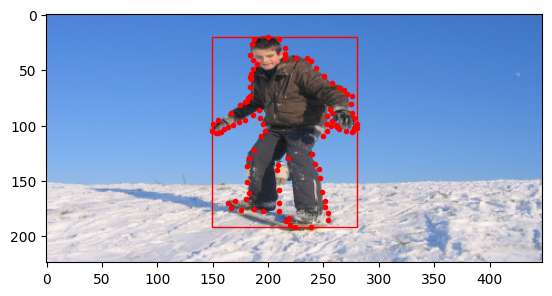

In [258]:
test_i = 79

x, y = person_instance_dataset[test_i]

plt.imshow((x.permute(1, 2, 0) * 255).round().byte().numpy())

for i, bbox in enumerate(y["bboxes"]):
    # if y["bboxValidity"][i] == 0:
    #     continue
    
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1), 
            x2 - x1, y2 - y1,
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

for i, segmentation in enumerate(y["segmentations"]):
    for j, point in enumerate(segmentation):
        # if y["segmentationValidity"][i][j] == 0:
        #     continue
        
        x_, y_ = point * T.tensor(image_shape)
        plt.plot(x_, y_, color="red", marker=".")

plt.show()

# COCO Person Keypoints

In [9]:
from motion_capture.data.datasets import COCO2017PersonKeypointsDataset
import torch as T
import matplotlib.pyplot as plt
from matplotlib import patches

image_shape = (448, 224)
person_keypoints_dataset = COCO2017PersonKeypointsDataset(
    image_folder_path = "//192.168.2.206/data/datasets/COCO2017/images",
    annotation_folder_path = "//192.168.2.206/data/datasets/COCO2017/annotations",
    image_shape_WH = image_shape,
    min_person_bbox_size = 100
)
len(person_keypoints_dataset)

70531

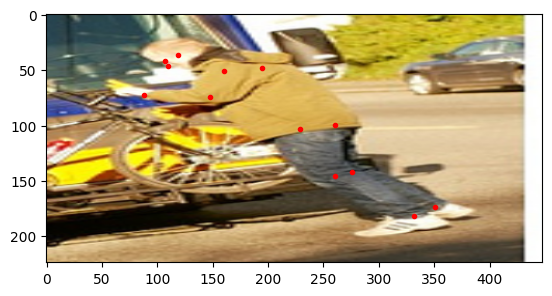

In [14]:
test_i = 6

x, y = person_keypoints_dataset[test_i]

plt.imshow((x * 255).permute(1, 2, 0).round().byte().numpy())

for i, kpt in enumerate(y["keypoints"]):
    if not y["keypointValidity"].argmax(1)[i]:
        continue
    
    x_, y_ = kpt * T.tensor(image_shape)
    plt.plot(x_, y_, color="red", marker=".")

plt.show()

# HAKE Large

In [1]:
from motion_capture.data.datasets import HAKELarge
import torch as T
import matplotlib.pyplot as plt
from matplotlib import patches

image_shape = (448, 224)
hake_dataset = HAKELarge(
    annotation_path = "\\\\192.168.2.206\\data\\datasets\\HAKE\\Annotations",
    image_path = "\\\\192.168.2.206\\data\\datasets\\HAKE-large",
    image_shape_WH = image_shape,
)
len(hake_dataset)

108852

10


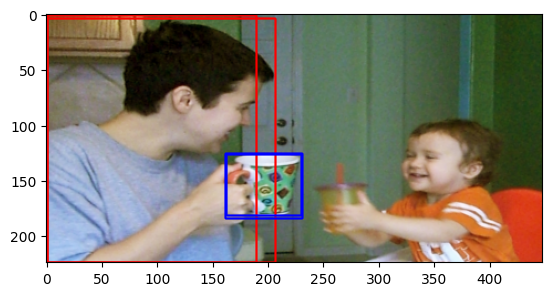

In [2]:
test_i = 0

x, y, z = hake_dataset[test_i]

plt.imshow((x * 255).permute(1, 2, 0).byte().numpy())

print(len(z["humanBboxes"]))

for bbox in z["humanBboxes"]:
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1), 
            x2 - x1, y2 - y1,
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

for bbox in z["objectBboxes"]:
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1), 
            x2 - x1, y2 - y1,
            linewidth=1, 
            edgecolor="blue", 
            facecolor="none"))


# MPII

In [6]:
from motion_capture.data.datasets import MPIIDataset

mpii_dataset = MPIIDataset(
    output_full_image_shape_WH=(448, 224),
    output_person_image_shape_WH=(224, 112),
    annotation_path="//192.168.2.206/data/datasets/MPII/annotations",
    image_folder_path="//192.168.2.206/data/datasets/MPII/images"
)
len(mpii_dataset)

29116

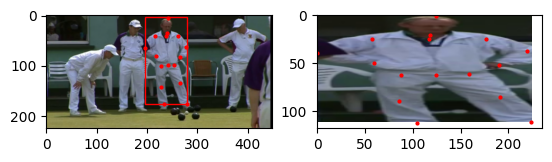

In [7]:
test_i = 110


_, ax = plt.subplots(1, 2)

# plot full image, keypoints, center and bounding box
ax[0].imshow(mpii_dataset[test_i]["fullImage"].permute(1,2,0).byte().numpy())

for dp in mpii_dataset[test_i]["globalKeypoints"]:
    ax[0].plot(dp[0], dp[1], "ro", markersize=2)

x, y = mpii_dataset[test_i]["personBbox"][0]
w, h = mpii_dataset[test_i]["personBbox"][1]
ax[0].add_patch(
    patches.Rectangle(
        (x-w, y-h), 
        w*2, h*2, 
        linewidth=1, 
        edgecolor="red", 
        facecolor="none"))

# plot person image and keypoints
ax[1].imshow(mpii_dataset[test_i]["personImage"].permute(1,2,0).byte().numpy())

for dp in mpii_dataset[test_i]["localKeypoints"]:
    ax[1].plot(dp[0], dp[1], "ro", markersize=2)

plt.show()

# COCO Panoptics Object Detection

In [1]:
from motion_capture.data.datasets import COCOPanopticsObjectDetection
import matplotlib.pyplot as plt
from matplotlib import patches
import torch as T

image_shape = (448, 224)
coco_panoptic_dataset = COCOPanopticsObjectDetection(
    image_folder_path = "//192.168.2.206/data/datasets/COCO2017/images",
    panoptics_path = "//192.168.2.206/data/datasets/COCO2017/panoptic_annotations_trainval2017/annotations",
    image_shape_WH=image_shape,
    max_number_of_instances=100
)
len(coco_panoptic_dataset)

123267

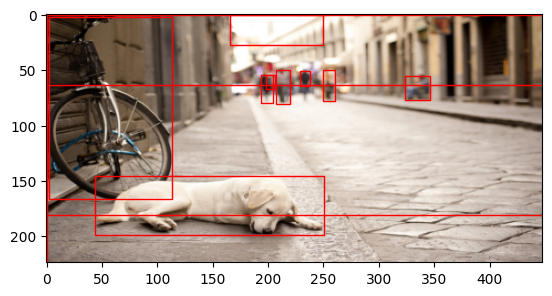

In [2]:
test_i = 12

x, y = coco_panoptic_dataset[test_i]

plt.imshow((x * 255).permute(1, 2, 0).round().byte().numpy())

# plot full image and bounding box
for i, bbox in enumerate(y["bboxes"]):
    if not y["validity"].argmax(1)[i]:
        continue
    
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1),
            x2 - x1, y2 - y1, 
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

plt.show()

# COCO Captions

In [8]:
class COCO2017CaptionsDataset(data.Dataset):
    
    def __init__(
        self,
        image_folder_path: str,
        annotation_folder_path: str):
        
        super().__init__()
        
        self.image_folder_path = image_folder_path
        self.annotation_path = annotation_folder_path
        
        with open(os.path.join(annotation_folder_path, "captions_train2017.json"), "r") as f:
            self.train_datapoints = json.load(f)
            
        with open(os.path.join(annotation_folder_path, "captions_val2017.json"), "r") as f:
            self.val_datapoints = json.load(f)
            
    def __len__(self):
        return len(self.all_datapoints)
    
    def __getitem__(self, idx):
        return self.all_datapoints[idx]

In [13]:
from motion_capture.data.datasets import COCO2017PersonKeypointsDataset

coco_dataset = COCO2017PersonKeypointsDataset(
    image_folder_path="//192.168.2.206/data/datasets/COCO2017/images",
    annotation_folder_path="//192.168.2.206/data/datasets/COCO2017/annotations",
    output_full_image_shape_WH=(448, 224),
    output_person_image_shape_WH=(224, 112),
    load_val_only=False
)
len(coco_dataset)

38840

1


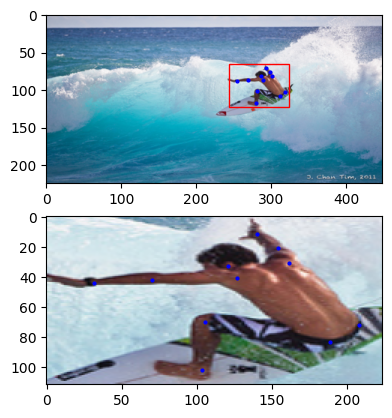

In [7]:
test_i = 20000

full_image = coco_dataset[test_i]["fullImage"].permute(1, 2, 0).round().byte().numpy()

num_persons = coco_dataset[test_i]["personImages"].shape[0]

print(num_persons)

# create plot scale it to number of persons
fig, ax = plt.subplots(num_persons + 1)
# fig.set_size_inches(10, 10 * (num_persons + 1))


ax[0].imshow(full_image)

for i in range(num_persons):
    
    # keypoints, bounding box and segmentation in full image
    kpts = coco_dataset[test_i]["globalKeypoints"][i]
    vis = coco_dataset[test_i]["keypointVisibility"][i]
    val = coco_dataset[test_i]["keypointValidity"][i]
    
    for j in range(kpts.shape[0]):
        if vis[j]:
            ax[0].plot(kpts[j][0], kpts[j][1], "bo", markersize=2)
        elif val[j]:
            ax[0].plot(kpts[j][0], kpts[j][1], "ro", markersize=2)
    
    x, y = coco_dataset[test_i]["personBboxes"][i][0]
    w, h = coco_dataset[test_i]["personBboxes"][i][1]
    ax[0].add_patch(
        patches.Rectangle(
            (x-w, y-h), 
            w*2, h*2, 
            linewidth=1, 
            edgecolor="red", 
            facecolor="none"))

    # plot individual person image and keypoints
    person_image = coco_dataset[test_i]["personImages"][i].permute(1, 2, 0).round().byte().numpy()
    ax[i+1].imshow(person_image)
    
    kpts = coco_dataset[test_i]["localKeypoints"][i]
    vis = coco_dataset[test_i]["keypointVisibility"][i]
    val = coco_dataset[test_i]["keypointValidity"][i]
    for j in range(kpts.shape[0]):
        if vis[j]:
            ax[i+1].plot(kpts[j][0], kpts[j][1], "bo", markersize=2)
        elif val[j]:
            ax[i+1].plot(kpts[j][0], kpts[j][1], "ro", markersize=2)

plt.show()


# COCO Person Whole Body

In [1]:
# class COCO2017PersonWholeBody(data.Dataset):
    
#     def __init__(self, annotations_folder_path: str, image_folder_path: str, image_shape_WH: tuple, min_person_bbox_size: int = 100, padding: int = 20):
#         super().__init__()
        
#         self.annotations_folder_path = annotations_folder_path
#         self.image_folder_path = image_folder_path
#         self.image_shape = image_shape_WH
#         self.padding = padding
        
#         area = min_person_bbox_size ** 2
        
#         with open(os.path.join(annotations_folder_path, "coco_wholebody_val_v1.0.json"), "r") as f:
#             val_json = json.load(f)
#         with open(os.path.join(annotations_folder_path, "coco_wholebody_train_v1.0.json"), "r") as f:
#             train_json = json.load(f)
        
#         images = pd.DataFrame.from_records((*train_json["images"], *val_json["images"]))
#         annotations = pd.DataFrame.from_records((*train_json["annotations"], *val_json["annotations"]))
#         # images = pd.DataFrame.from_records(val_json["images"])
#         # annotations = pd.DataFrame.from_records(val_json["annotations"])
        
#         self.all_datapoints = pd.merge(annotations, images, right_on="id", left_on="image_id")
#         self.all_datapoints["image_path"] = self.image_folder_path + "/" + self.all_datapoints["file_name"]
#         self.all_datapoints = self.all_datapoints[self.all_datapoints["bbox"].map(lambda x: x[2] * x[3] > area)]
        
#         validity_mask = (self.all_datapoints["num_keypoints"] != 0) | self.all_datapoints["face_valid"] | self.all_datapoints["lefthand_valid"] | self.all_datapoints["righthand_valid"] | self.all_datapoints["foot_valid"]
#         self.all_datapoints = self.all_datapoints[validity_mask]
        
#         self.all_datapoints.reset_index(drop=True, inplace=True)
        
#     def format_keypoints(self, datapoint):
#         kpts = T.cat([
#             T.tensor(datapoint["keypoints"]).reshape(-1, 3),
#             T.tensor(datapoint["face_kpts"]).reshape(-1, 3),
#             T.tensor(datapoint["lefthand_kpts"]).reshape(-1, 3),
#             T.tensor(datapoint["righthand_kpts"]).reshape(-1, 3),
#             T.tensor(datapoint["foot_kpts"]).reshape(-1, 3)
#         ]).to(dtype=T.float32)
        
#         kpts_visibility = kpts[:, 2] == 2
#         kpts_validity = kpts[:, 2] > 0
#         kpts = kpts[:, :2]
        
#         return kpts, kpts_validity, kpts_visibility
    
#     def __len__(self):
#         return len(self.all_datapoints)
    
#     def __getitem__(self, idx):
        
#         datapoint = self.all_datapoints.iloc[idx]
        
#         # load image
#         image = read_image(datapoint["image_path"], mode=ImageReadMode.RGB).to(dtype=T.float32)
#         person_bbox = T.tensor(datapoint["bbox"], dtype=T.int16).reshape(2, 2)
#         face_bbox = T.tensor(datapoint["face_box"], dtype=T.int16).reshape(2, 2)
#         lefthand_bbox =T.tensor(datapoint["lefthand_box"], dtype=T.int16).reshape(2, 2)
#         righthand_bbox = T.tensor(datapoint["righthand_box"], dtype=T.int16).reshape(2, 2)
#         all_keypoints, kpt_val, kpt_vis = self.format_keypoints(datapoint)
        
#         # add padding to bounding boxes
#         person_bbox[0] -= self.padding
#         person_bbox[1] += self.padding * 2
        
#         # crop persons
#         person_crop = crop(image, person_bbox[0][1], person_bbox[0][0], person_bbox[1][1], person_bbox[1][0])
#         person_crop = resize(person_crop, self.image_shape[::-1]) / 255
        
#         # scale keypoints
#         all_keypoints = scale_points(all_keypoints - person_bbox[0], person_bbox[1], [1, 1])
        
#         # scale bounding boxes
#         face_bbox = scale_points(face_bbox.to(dtype=T.float32) - T.stack([person_bbox[0], T.zeros(2)]), person_bbox[1], [1, 1])
#         lefthand_bbox = scale_points(lefthand_bbox.to(dtype=T.float32) - T.stack([person_bbox[0], T.zeros(2)]), person_bbox[1], [1, 1])
#         righthand_bbox = scale_points(righthand_bbox.to(dtype=T.float32) - T.stack([person_bbox[0], T.zeros(2)]), person_bbox[1], [1, 1])
        
#         # format bounding boxes
#         person_bbox[1] += person_bbox[0]
#         face_bbox[1] += face_bbox[0]
#         lefthand_bbox[1] += lefthand_bbox[0]
#         righthand_bbox[1] += righthand_bbox[0]
        
#         # onehot encode keypoints
#         kpt_val = one_hot(kpt_val.to(dtype=T.int64), 2)
#         kpt_vis = one_hot(kpt_vis.to(dtype=T.int64), 2)
        
#         return person_crop, {
#             "keypoints": all_keypoints,
#             "keypointsValidity": kpt_val,
#             "keypointsVisibility": kpt_vis,
#             "faceBbox": face_bbox.flatten(),
#             "lefthandBbox": lefthand_bbox.flatten(),
#             "righthandBbox": righthand_bbox.flatten(),
#         }
    
#     # TODO: create a function to formal keypoints back to readable
#     def concat_keypoints(
#         self,
#         body_keypoints, face_keypoints, left_hand_keypoints, right_hand_keypoints, foot_keypoints,
#         body_visibility, face_visibility, left_hand_visibility, right_hand_visibility, foot_visibility,
#         body_validity, face_validity, left_hand_validity, right_hand_validity, foot_validity):
#         return (
#             T.cat([body_keypoints, face_keypoints, left_hand_keypoints, right_hand_keypoints, foot_keypoints]),
#             T.cat([body_visibility, face_visibility, left_hand_visibility, right_hand_visibility, foot_visibility]),
#             T.cat([body_validity, face_validity, left_hand_validity, right_hand_validity, foot_validity])
#         )

In [2]:
from motion_capture.data.datasets import COCO2017PersonWholeBody
import matplotlib.pyplot as plt
from matplotlib import patches
import torch as T

image_shape = (448, 224)
coco_wholebody_dataset = COCO2017PersonWholeBody(
    annotations_folder_path="//192.168.2.206/data/datasets/COCO2017/annotations",
    image_folder_path="//192.168.2.206/data/datasets/COCO2017/images",
    image_shape_WH=image_shape,
    min_person_bbox_size=100
)
len(coco_wholebody_dataset)

91572

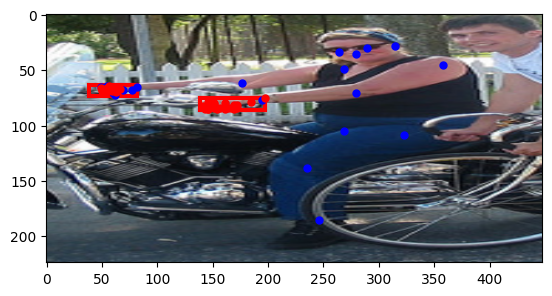

In [4]:
test_i = 119
x, y = coco_wholebody_dataset[test_i]

# plot person image
plt.imshow((x * 255).permute(1, 2, 0).round().byte().numpy())

# plot keypoints
kpts = y["keypoints"]
vis = y["keypointsVisibility"]
val = y["keypointsValidity"]
for j in range(kpts.shape[0]):
    if vis.argmax(1)[j] == 1:
        plt.plot(kpts[j][0] * image_shape[0], kpts[j][1] * image_shape[1], "bo", markersize=5)
    elif val.argmax(1)[j] == 1:
        plt.plot(kpts[j][0] * image_shape[0], kpts[j][1] * image_shape[1], "ro", markersize=5)

# plot bounding boxes
bboxes = [y["faceBbox"], y["lefthandBbox"], y["righthandBbox"]]
for bbox in bboxes:
    x1, y1, x2, y2 = bbox * T.tensor(image_shape * 2)
    plt.gca().add_patch(
        patches.Rectangle(
            (x1, y1),
            x2 - x1, y2 - y1,
            linewidth=3, 
            edgecolor="red", 
            facecolor="none"))


plt.show()

# hico_det

In [ ]:
# hd = scipy.io.loadmat("./../_data/_usefull/_images/Halpe-FullBody/hico_det/anno.mat")
# hd_bb = scipy.io.loadmat("./../_data/_usefull/_images/Halpe-FullBody/hico_det/anno_bbox.mat")

# """

# len(hd_bb["bbox_train"][0][i][1][0]) = 1

# len(hd_bb["bbox_train"][0][i][0]) = 1
# (name)


# """

In [ ]:
# hd_bb.keys()

In [ ]:
# print(len(hd["list_train"]), len(hd["list_test"]))

# hd_bb["bbox_train"][0][0][0]
# hd_bb["bbox_train"][0][0][1]

# for i in range(len(hd_bb["bbox_train"][0])):
#     image_name = hd_bb["bbox_train"][0][i][0][0]

#     width, height, depth = hd_bb["bbox_train"][0][i][1][0][0]
#     width, height, depth = width[0][0], height[0][0], depth[0][0]


# sum([len(hd_bb["bbox_train"][0][i][2][0]) for i in range(len(hd_bb["bbox_train"][0]))])

# [b[1] for b in hd_bb["bbox_train"][0][0][2][0]]




# RHDv2

In [ ]:
# arr = pickle.load(open("./../_data/_usefull/_images/RHD_published_v2/training/anno_training.pickle", "br"))

"""

arr[i]["xyz"] = xyz keypoints
arr[i]["uv_vis] = uv + visibility
arr[i]["K"] = camera
(i == image)


"""
None

# HAKE

In [ ]:
# hake_large_annotation = json.load(open("./../_data/_usefull/_images/HAKE/Annotations/hake_large_annotation.json", "r"))
# hico_det_training_set_instance_level = json.load(open("./../_data/_usefull/_images/HAKE/Annotations/hico-det-training-set-instance-level.json", "r"))
# hico_training_set_image_level = json.load(open("./../_data/_usefull/_images/HAKE/Annotations/hico-training-set-image-level.json", "r"))

"""

hico training set image level

{'arm_list': [0, 0, 0, 0, 1], 
'foot_list': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
'hand_list': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
'head_list': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
'hip_list': [1, 0, 0, 0, 0], 
'hoi_id': [153, 154, 155, 156], 
'leg_list': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
'parts_list': [1, 1, 1, 1, 1, 0, 1, 0, 0, 1]}


hico det training set instance level

{'dataset': 'hico-det', 
'labels': [
    {
        'action_labels': 
            [{'human_part': 6, 'partstate': 0}, 
            {'human_part': 9, 'partstate': 0}, 
            {'human_part': 4, 'partstate': 0}, 
            {'human_part': 0, 'partstate': 0}, 
            {'human_part': 3, 'partstate': 0}], 
        'height': 480, 
        'hoi_id': 153, 
        'human_bbox': [208, 33, 427, 300], 
        'object_bbox': [59, 98, 572, 405], 
        'width': 640
    }, 
    {
        'action_labels': 
            [{'human_part': 4, 'partstate': 0}, 
            {'human_part': 1, 'partstate': 6}, 
            {'human_part': 2, 'partstate': 6}], 
        'height': 480, 
        'hoi_id': 156, 
        'human_bbox': [209, 26, 444, 317], 
        'object_bbox': [59, 99, 579, 395], 
        'width': 640
    },
        ...], 
'path_prefix': 'hico_20160224_det/images/train2015'}



hake large annotation

{'dataset': 'hico-det', 
'labels': [
    {'action_labels': 
        [{'human_part': 6, 'partstate': 0}, {'human_part': 9, 'partstate': 0}, {'human_part': 4, 'partstate': 0}, {'human_part': 0, 'partstate': 0}, {'human_part': 3, 'partstate': 0}], 'height': 480, 'hoi_id': 153, 'human_bbox': [208, 33, 427, 300], 'object_bbox': [59, 98, 572, 405], 'width': 640}, 
    {'action_labels': 
        [{'human_part': 4, 'partstate': 0}, {'human_part': 1, 'partstate': 6}, {'human_part': 2, 'partstate': 6}], 'height': 480, 'hoi_id': 156, 'human_bbox': [209, 26, 444, 317], 'object_bbox': [59, 99, 579, 395], 'width': 640}, 
    {'action_labels': 
        [{'human_part': 6, 'partstate': 0}, {'human_part': 9, 'partstate': 0}, {'human_part': 4, 'partstate': 0}, {'human_part': 0, 'partstate': 0}, {'human_part': 3, 'partstate': 0}], 'height': 480, 'hoi_id': 154, 'human_bbox': [213, 20, 438, 357], 'object_bbox': [77, 115, 583, 396], 'width': 640}, {'action_labels': [{'human_part': 4, 'partstate': 0}], 'height': 480, 'hoi_id': 155, 'human_bbox': [206, 33, 427, 306], 'object_bbox': [61, 100, 571, 401], 'width': 640}], 
    ...
    
'path_prefix': 'hico_20160224_det/images/train2015'}


"""
None

# FreiHAND

In [ ]:
"""
training_K = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_K.json", "r"))
training_mano = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_mano.json", "r"))
training_scale = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_scale.json", "r"))
training_verts = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_verts.json", "r"))
training_xyz = json.load(open("./../_data/_usefull/FreiHAND/FreiHAND_pub_v2/training_xyz.json", "r"))

# length is the same for all = 32560 = number of greenscreened images

K = intrinsic camera matrix
mano = mano annotations ?
verts = 3d vertecies
xyz = 3d shape
"""

# Kinect

In [ ]:
# info = json.load(open("./../_data/_usefull/KinectDatasets/data/training/info.json", "r"))
# calib = json.load(open("./../_data/_usefull/KinectDatasets/data/training/calib.json", "r"))
# anno = json.load(open("./../_data/_usefull/KinectDatasets/data/training/anno.json", "r"))
# pred_sdk = json.load(open("./../_data/_usefull/KinectDatasets/data/training/pred_sdk.json", "r"))

# captury_info = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/info.json", "r"))
# captury_calib = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/calib.json", "r"))
# captury_anno = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/anno.json", "r"))
# captury_pred_sdk = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/pred_sdk.json", "r"))
# captury_pred_sdk_cap = json.load(open("./../_data/_usefull/KinectDatasets/data/captury_train/pred_sdk_cap.json", "r"))

"""
1920x1080

anno[0][0] = 18 kpts + vis

pred_sdk[0][i] = 25 kpts + vis (is a prediction)
(i == 4 for all)


captury_pred_sdk[0][i] = 25 kpts + vis
(i == 1 for all)

captury_pred_sdk_cap[0][i] = 25 kpts + vis
(i == 2 for all)


"""
None